In [2]:
## Importing necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
## To upload file in colab
from google.colab import files
uploaded=files.upload()

Saving Mobile_Price_Prediction.csv to Mobile_Price_Prediction.csv


In [4]:
df= pd.read_csv('Mobile_Price_Prediction.csv')
df.head(4)

,Unnamed: 0,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,...,Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
0,0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,4085,6.67,Yes,1440,3120,8,...,48.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,58998
1,1,Realme X2 Pro,Realme,X2 Pro,4000,6.50,Yes,1080,2400,8,...,64.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,27999
2,2,iPhone 11 Pro Max,Apple,iPhone 11 Pro Max,3969,6.50,Yes,1242,2688,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,106900
3,3,iPhone 11,Apple,iPhone 11,3110,6.10,Yes,828,1792,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,62900


# **Data Cleaning**

In [5]:
## Dataset is taken from Kaggle.So there is no missing value and it of correct type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1359 non-null   int64  
 1   Name                    1359 non-null   object 
 2   Brand                   1359 non-null   object 
 3   Model                   1359 non-null   object 
 4   Battery capacity (mAh)  1359 non-null   int64  
 5   Screen size (inches)    1359 non-null   float64
 6   Touchscreen             1359 non-null   object 
 7   Resolution x            1359 non-null   int64  
 8   Resolution y            1359 non-null   int64  
 9   Processor               1359 non-null   int64  
 10  RAM (MB)                1359 non-null   int64  
 11  Internal storage (GB)   1359 non-null   float64
 12  Rear camera             1359 non-null   float64
 13  Front camera            1359 non-null   float64
 14  Operating system        1359 non-null   

In [6]:
df.Price.max()

174990

In [7]:
df.Price.min()

494

In [8]:
df.describe()

,Unnamed: 0,Battery capacity (mAh),Screen size (inches),Resolution x,Resolution y,Processor,RAM (MB),Internal storage (GB),Rear camera,Front camera,Number of SIMs,Price
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,679.000000,2938.489330,5.291310,811.543046,1490.777778,5.551141,2488.777778,30.654864,12.070199,7.037969,1.833701,11465.825607
std,392.453819,873.514133,0.671357,270.707271,557.780120,2.196562,1664.440386,36.950241,8.948337,6.295448,0.374457,13857.497077
min,0.000000,1010.000000,2.400000,240.000000,320.000000,1.000000,64.000000,0.064000,0.000000,0.000000,1.000000,494.000000
25%,339.500000,2300.000000,5.000000,720.000000,1280.000000,4.000000,1000.000000,8.000000,8.000000,2.000000,2.000000,4763.500000
50%,679.000000,3000.000000,5.200000,720.000000,1280.000000,4.000000,2000.000000,16.000000,12.200000,5.000000,2.000000,6999.000000
75%,1018.500000,3500.000000,5.700000,1080.000000,1920.000000,8.000000,3000.000000,32.000000,13.000000,8.000000,2.000000,11999.000000
max,1358.000000,6000.000000,7.300000,2160.000000,3840.000000,10.000000,12000.000000,512.000000,108.000000,48.000000,3.000000,174990.000000


In [9]:
## Remove none utilizing column 
df.drop('Name', axis=1, inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('Resolution x', axis=1, inplace=True)
df.drop('Resolution y', axis=1, inplace=True)

In [10]:
df.sample(4)

,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Processor,RAM (MB),Internal storage (GB),Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
1067,Panasonic,T44 Lite,2400,4.0,Yes,4,512,8.0,2.0,0.3,Android,Yes,Yes,No,2,Yes,No,2190
1151,Yu,reka Note,4000,6.0,Yes,8,3000,16.0,13.0,5.0,Android,Yes,Yes,Yes,2,Yes,Yes,6499
707,Vivo,Z10,3225,6.0,Yes,8,4000,32.0,16.0,24.0,Android,Yes,Yes,Yes,1,No,No,7994
537,Microsoft,Lumia 540 Dual SIM,2200,5.0,Yes,4,1000,8.0,8.0,5.0,Windows,Yes,Yes,Yes,2,Yes,No,7000


In [11]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [12]:
plt.style.use('ggplot')

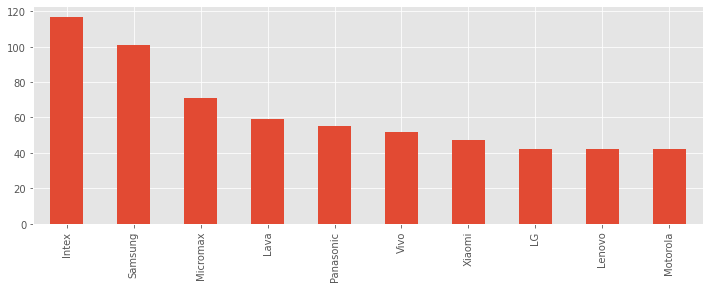

In [13]:
plt.figure(figsize=(12,4))
df.Brand.value_counts().head(10).plot(kind='bar');

Obervation: Higher number of mobile belong to Intex brand followed by Samsung


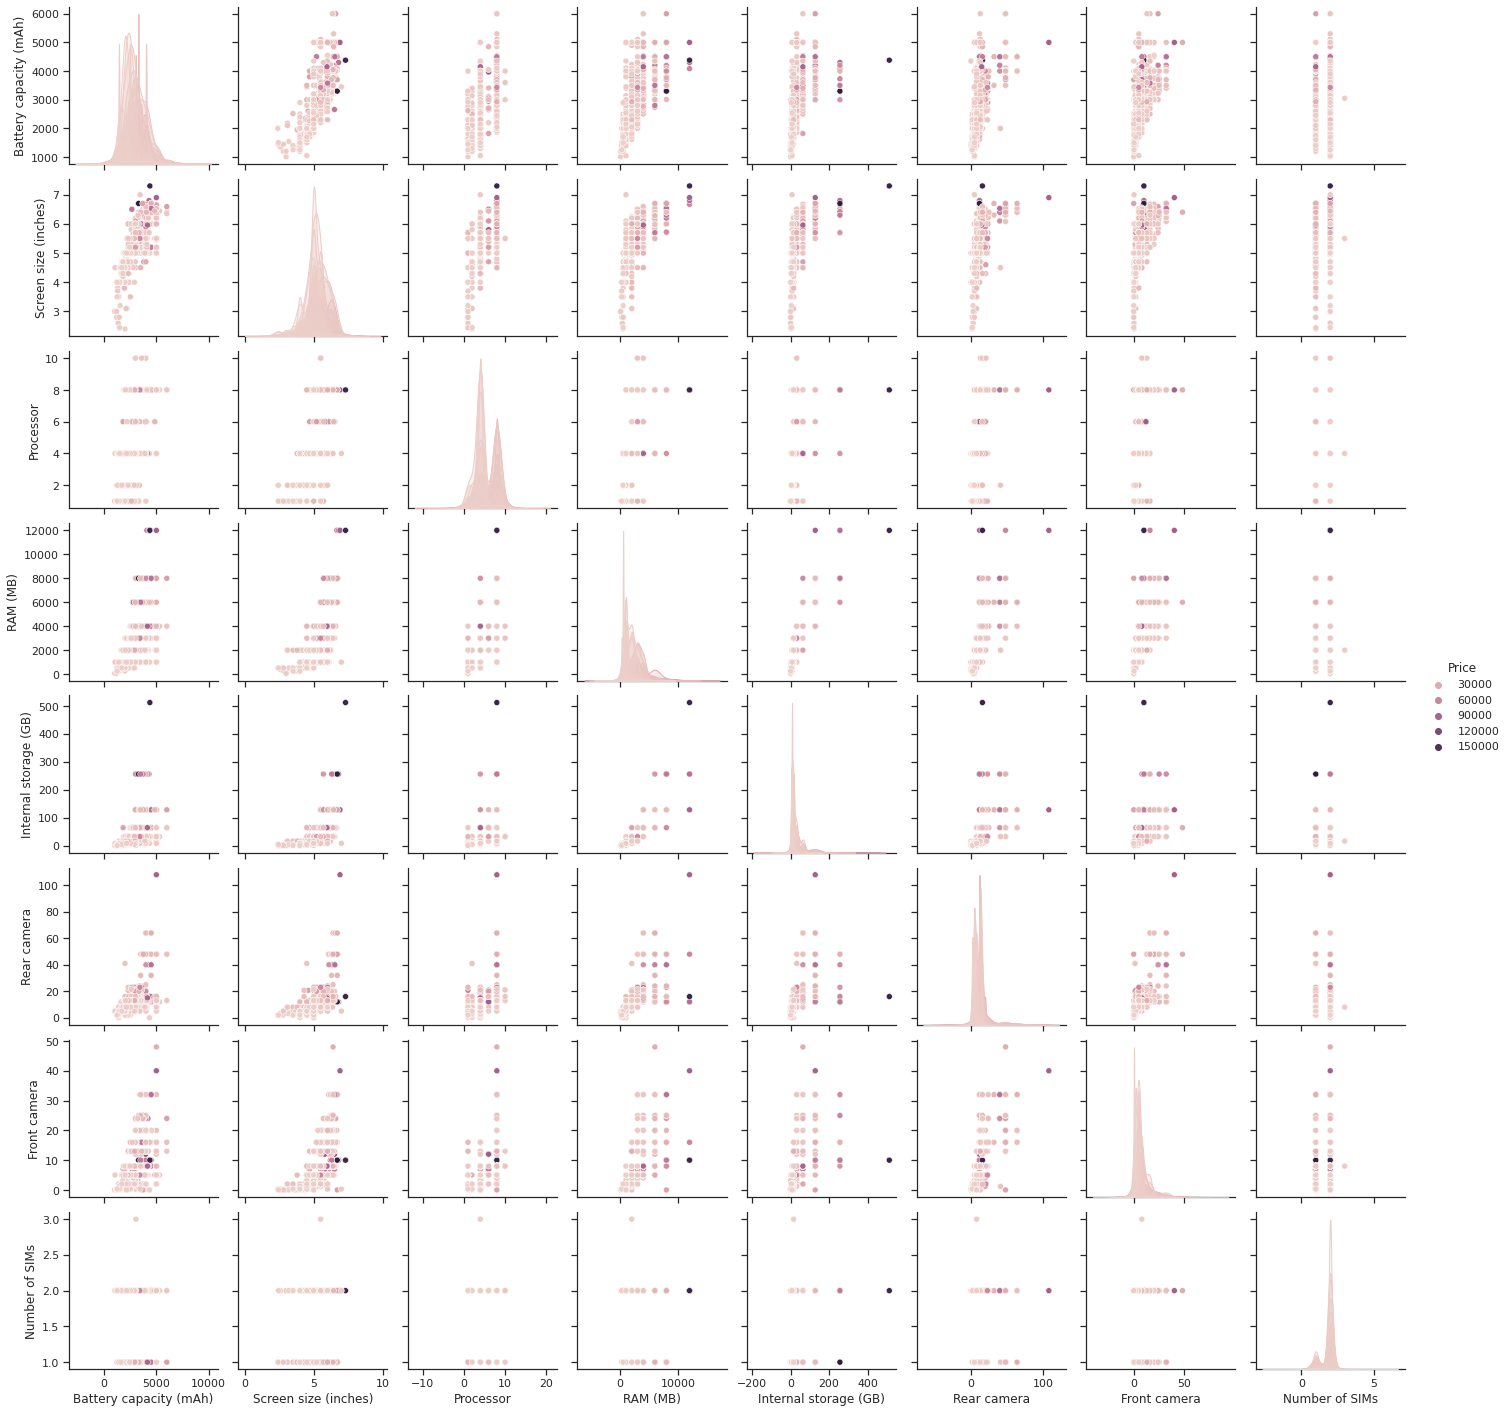

In [14]:
sns.set_theme(style= 'ticks')
sns.pairplot(df, hue= 'Price');

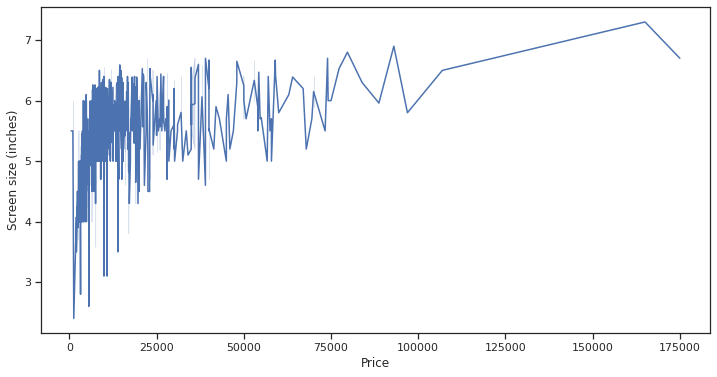

In [15]:
plt.figure(figsize=(12,6))
sns.lineplot(x= 'Price', y= 'Screen size (inches)', data= df);

Observation: Biggest screen size is 7 inch, which belong in the price range of above 1.60L

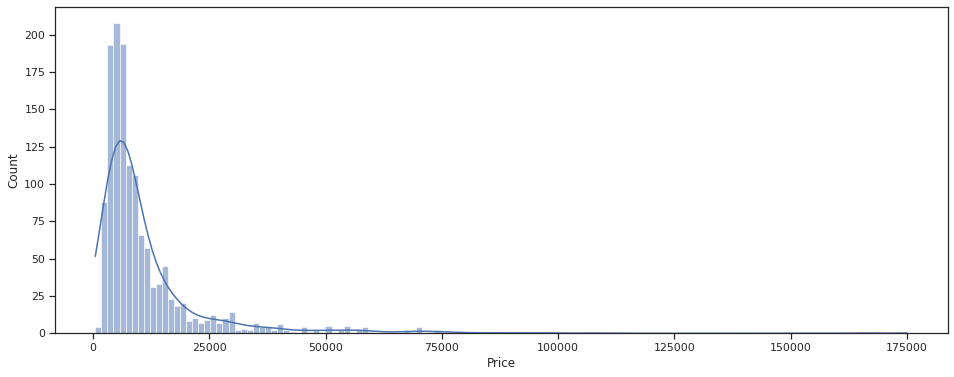

In [16]:
plt.figure(figsize=(16,6))
sns.histplot(df.Price, kde=True);

In [17]:
df.columns

Index(['Brand', 'Model', 'Battery capacity (mAh)', 'Screen size (inches)',
       'Touchscreen', 'Processor', 'RAM (MB)', 'Internal storage (GB)',
       'Rear camera', 'Front camera', 'Operating system', 'Wi-Fi', 'Bluetooth',
       'GPS', 'Number of SIMs', '3G', '4G/ LTE', 'Price'],
      dtype='object')

In [18]:
## Renaming the name of the column
col_nams = ['Brand', 'Model', 'Batterycapacity', 'Screensize',
       'Touchscreen', 'Processor', 'RAM', 'Internalstorage',
       'RearCamera', 'FrontCamera', 'OperatingSystem', 'WiFi', 'Bluetooth',
       'GPS', 'NumberofSIMs', 'ThreeG', 'FourG', 'Price']

In [19]:
df.columns = col_nams

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            1359 non-null   object 
 1   Model            1359 non-null   object 
 2   Batterycapacity  1359 non-null   int64  
 3   Screensize       1359 non-null   float64
 4   Touchscreen      1359 non-null   object 
 5   Processor        1359 non-null   int64  
 6   RAM              1359 non-null   int64  
 7   Internalstorage  1359 non-null   float64
 8   RearCamera       1359 non-null   float64
 9   FrontCamera      1359 non-null   float64
 10  OperatingSystem  1359 non-null   object 
 11  WiFi             1359 non-null   object 
 12  Bluetooth        1359 non-null   object 
 13  GPS              1359 non-null   object 
 14  NumberofSIMs     1359 non-null   int64  
 15  ThreeG           1359 non-null   object 
 16  FourG            1359 non-null   object 
 17  Price         

In [21]:
## Changing categorical feature into binary number
df.Touchscreen = df.Touchscreen.map({'Yes':1,'No':0}).astype('int64')
df.WiFi = df.WiFi.map({'Yes':1,'No':0}).astype('int64')
df.Bluetooth = df.Bluetooth.map({'Yes':1,'No':0}).astype('int64')
df.GPS = df.GPS.map({'Yes':1,'No':0}).astype('int64')
df.ThreeG = df.ThreeG.map({'Yes':1,'No':0}).astype('int64')
df.FourG = df.FourG.map({'Yes':1,'No':0}).astype('int64')


In [22]:
## changing object type into integer
df.Internalstorage = df.Internalstorage.astype('int64')
df.RearCamera = df.RearCamera.astype('int64')
df.FrontCamera = df.FrontCamera.astype('int64')
df.Screensize = df.Screensize.astype('int64')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Brand            1359 non-null   object
 1   Model            1359 non-null   object
 2   Batterycapacity  1359 non-null   int64 
 3   Screensize       1359 non-null   int64 
 4   Touchscreen      1359 non-null   int64 
 5   Processor        1359 non-null   int64 
 6   RAM              1359 non-null   int64 
 7   Internalstorage  1359 non-null   int64 
 8   RearCamera       1359 non-null   int64 
 9   FrontCamera      1359 non-null   int64 
 10  OperatingSystem  1359 non-null   object
 11  WiFi             1359 non-null   int64 
 12  Bluetooth        1359 non-null   int64 
 13  GPS              1359 non-null   int64 
 14  NumberofSIMs     1359 non-null   int64 
 15  ThreeG           1359 non-null   int64 
 16  FourG            1359 non-null   int64 
 17  Price            1359 non-null   

In [24]:
## To remove decimal from column Internal Storage, Rear Camera, front Camera & screen size
def point(st):
    return st.split('.')[0]

In [25]:
df.Internalstorage.unique()

array([256,  64, 128,  32,  16,   8,   4,   0,   3, 512,   2,   1])

In [26]:
# df.RearCamera.apply(point)

In [27]:
df.RearCamera.unique()

array([ 48,  64,  12,  16,  40,  13,  23,  21,  32,  24,  20,  19,   2,
        18,   8,   5,  10,   3,  41, 108,  25,   0,  15])

In [28]:
# df.FrontCamera.apply(point)

In [29]:
df.FrontCamera.unique()

array([16, 12, 32, 10, 24, 20, 25, 13,  8,  7,  5,  4, 48,  0,  1,  2,  3,
       40])

In [30]:
# df.Screensize.apply(point)

In [31]:
df.Screensize.unique()

array([6, 5, 4, 2, 3, 7])

In [32]:
df.sample(4)

,Brand,Model,Batterycapacity,Screensize,Touchscreen,Processor,RAM,Internalstorage,RearCamera,FrontCamera,OperatingSystem,WiFi,Bluetooth,GPS,NumberofSIMs,ThreeG,FourG,Price
589,Nokia,Lumia 520,1430,4,1,2,512,8,5,0,Windows,1,1,1,1,1,0,3850
290,Realme,C1,4230,6,1,8,2000,16,13,5,Android,1,1,0,1,0,0,7990
1096,Oppo,A37,2630,5,1,4,2000,16,8,5,Android,1,1,1,2,1,1,8666
912,Intex,Aqua Crystal Plus,2100,5,1,4,2000,16,13,5,Android,1,1,1,2,0,1,7490


In [33]:
## Internal storage & RAM has higest correlation with target variable [Price]
df.corr()['Price'].abs().sort_values(ascending=False)

Price              1.000000
Internalstorage    0.644084
RAM                0.613446
RearCamera         0.378562
Screensize         0.325336
FrontCamera        0.310439
Processor          0.302492
Batterycapacity    0.297525
NumberofSIMs       0.162491
FourG              0.149792
GPS                0.066807
Touchscreen        0.050460
WiFi               0.028506
Bluetooth          0.027999
ThreeG             0.003769
Name: Price, dtype: float64

In [34]:
## Using ohe-hot encoding to convert categorical column into numeric
df= pd.get_dummies(data= df, columns=['Brand'],prefix='Brand')
df= pd.get_dummies(data= df, columns=['OperatingSystem'],prefix='OS')

In [35]:
df.columns

Index(['Model', 'Batterycapacity', 'Screensize', 'Touchscreen', 'Processor',
       'RAM', 'Internalstorage', 'RearCamera', 'FrontCamera', 'WiFi',
       'Bluetooth', 'GPS', 'NumberofSIMs', 'ThreeG', 'FourG', 'Price',
       'Brand_10.or', 'Brand_Acer', 'Brand_Alcatel', 'Brand_Apple',
       'Brand_Aqua', 'Brand_Asus', 'Brand_Billion', 'Brand_Black Shark',
       'Brand_BlackBerry', 'Brand_Blu', 'Brand_Cat', 'Brand_Celkon',
       'Brand_Comio', 'Brand_Coolpad', 'Brand_Gionee', 'Brand_Google',
       'Brand_HP', 'Brand_HTC', 'Brand_Homtom', 'Brand_Honor', 'Brand_Huawei',
       'Brand_InFocus', 'Brand_Infinix', 'Brand_Intex', 'Brand_Itel',
       'Brand_Jio', 'Brand_Jivi', 'Brand_Karbonn', 'Brand_Kult', 'Brand_LG',
       'Brand_Lava', 'Brand_LeEco', 'Brand_Lenovo', 'Brand_Lephone',
       'Brand_Lyf', 'Brand_M-tech', 'Brand_Meizu', 'Brand_Micromax',
       'Brand_Microsoft', 'Brand_Mobiistar', 'Brand_Motorola', 'Brand_Nokia',
       'Brand_Nubia', 'Brand_Nuu Mobile', 'Brand_OnePlus', 

In [36]:
## Selecting only numeric column to train the model
mobile= df.select_dtypes('number')
mobile.head(2)

,Batterycapacity,Screensize,Touchscreen,Processor,RAM,Internalstorage,RearCamera,FrontCamera,WiFi,Bluetooth,...,Brand_iBall,Brand_iVoomi,Brand_mPhone,OS_Android,OS_BlackBerry,OS_Cyanogen,OS_Sailfish,OS_Tizen,OS_Windows,OS_iOS
0,4085,6,1,8,12000,256,48,16,1,1,...,0,0,0,1,0,0,0,0,0,0
1,4000,6,1,8,6000,64,64,16,1,1,...,0,0,0,1,0,0,0,0,0,0


In [37]:
mobile.columns

Index(['Batterycapacity', 'Screensize', 'Touchscreen', 'Processor', 'RAM',
       'Internalstorage', 'RearCamera', 'FrontCamera', 'WiFi', 'Bluetooth',
       'GPS', 'NumberofSIMs', 'ThreeG', 'FourG', 'Price', 'Brand_10.or',
       'Brand_Acer', 'Brand_Alcatel', 'Brand_Apple', 'Brand_Aqua',
       'Brand_Asus', 'Brand_Billion', 'Brand_Black Shark', 'Brand_BlackBerry',
       'Brand_Blu', 'Brand_Cat', 'Brand_Celkon', 'Brand_Comio',
       'Brand_Coolpad', 'Brand_Gionee', 'Brand_Google', 'Brand_HP',
       'Brand_HTC', 'Brand_Homtom', 'Brand_Honor', 'Brand_Huawei',
       'Brand_InFocus', 'Brand_Infinix', 'Brand_Intex', 'Brand_Itel',
       'Brand_Jio', 'Brand_Jivi', 'Brand_Karbonn', 'Brand_Kult', 'Brand_LG',
       'Brand_Lava', 'Brand_LeEco', 'Brand_Lenovo', 'Brand_Lephone',
       'Brand_Lyf', 'Brand_M-tech', 'Brand_Meizu', 'Brand_Micromax',
       'Brand_Microsoft', 'Brand_Mobiistar', 'Brand_Motorola', 'Brand_Nokia',
       'Brand_Nubia', 'Brand_Nuu Mobile', 'Brand_OnePlus', 'Brand_On

In [38]:
X= mobile.drop('Price', axis=1)
y= mobile.Price

In [39]:
print(X.shape)
print(y.shape)

(1359, 97)
(1359,)


In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=13)

In [42]:
## Taken log to reduce the skewness in the data & roundoff the number
y_train = np.log(y_train)
y_test = np.log(y_test)

# **Linear Regression**

In [43]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [45]:
lm = LinearRegression()

In [46]:
lm.fit(X_train,y_train)

LinearRegression()

In [47]:
## In regression, score mean R suqare value
lm.score(X_train,y_train)

0.7532144027180391

In [48]:
lm.score(X_test,y_test)

0.6774023566789664

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


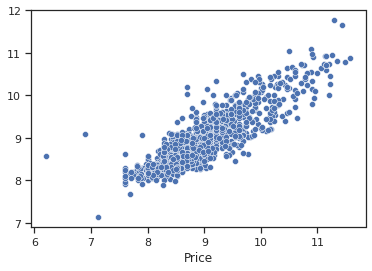

In [49]:
y_pred_train = lm.predict(X_train)
sns.scatterplot(y_train, y_pred_train);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


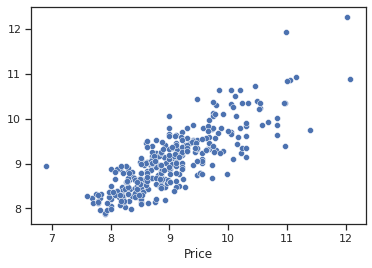

In [50]:
y_pred_test_lm = lm.predict(X_test)
sns.scatterplot(y_test, y_pred_test_lm);

In [51]:
## MAE
mean_absolute_error(y_test, y_pred_test_lm)

0.3418615693277487

In [52]:
## we have taken log of price column, so using exponancial to convert
np.exp(0.34186156932774675)

1.4075654337976151

In [53]:
## MSE
mean_squared_error(y_test, y_pred_test_lm)

0.20012010973287594

In [54]:
## RMSE
np.sqrt(mean_squared_error(y_test, y_pred_test_lm))

0.44734786210831046

In [55]:
## R2 score
r2_score(y_test, y_pred_test_lm)

0.6774023566789664

In [56]:
np.mean(y_test)

9.018285131127636

**Lasso**

In [57]:
lasso = Lasso(alpha=1)

In [58]:
lasso.fit(X_train, y_train)

Lasso(alpha=1)

In [59]:
lasso.score(X_train,y_train)

0.49518491894179373

In [60]:
lasso.score(X_test,y_test)

0.4761079081531535

**Ridge**

In [61]:
ridge = Ridge()

In [62]:
ridge.fit(X_train,y_train)

Ridge()

In [63]:
ridge.score(X_train, y_train)

0.7484062261450635

In [64]:
ridge.score(X_test, y_test)

0.684930557426473

In [65]:
mean_absolute_error(y_test,lm.predict(X_test))

0.3418615693277487

In [66]:
mean_absolute_error(y_test,lasso.predict(X_test))

0.4161906097267428

In [67]:
mean_absolute_error(y_test,ridge.predict(X_test))

0.3386278799738206

Ridge is has a minimum error

# **Auto ML**

In [68]:
pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [69]:
from lazypredict.Supervised import LazyRegressor

In [70]:
auto= LazyRegressor(random_state=13, ignore_warnings=True)

In [71]:
models= auto.fit(X_train,X_test,y_train,y_test)

 90%|█████████ | 38/42 [27:13<05:14, 78.71s/it] 

[13:27:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 42/42 [27:14<00:00, 38.92s/it]


In [72]:
models[0]

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.63,0.74,0.40,0.20
XGBRegressor,0.62,0.73,0.41,0.65
ExtraTreesRegressor,0.60,0.72,0.42,0.70
RandomForestRegressor,0.60,0.72,0.42,0.61
LGBMRegressor,0.57,0.70,0.43,0.09
HistGradientBoostingRegressor,0.57,0.69,0.44,0.81
BaggingRegressor,0.57,0.69,0.44,0.09
LassoLarsCV,0.56,0.69,0.44,0.16
BayesianRidge,0.56,0.68,0.44,0.03


### **XG Boost Regressor**

In [73]:
from xgboost import XGBRegressor

In [74]:
xgb = XGBRegressor(max_depth= 5, random_state=13)

In [75]:
xgb.fit(X_train,y_train)

[13:27:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=5, random_state=13)

In [76]:
xgb.score(X_train,y_train)

0.8494697952398317

In [77]:
xgb.score(X_test,y_test)

0.7412711689716822

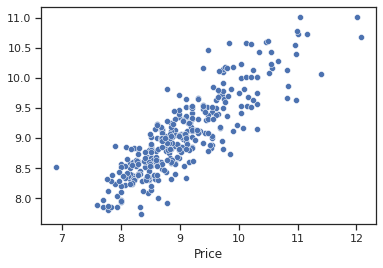

In [78]:
y_pred_test_xgb = xgb.predict(X_test)
sns.scatterplot(y_test, y_pred_test_xgb);

In [79]:
## MAE
mean_absolute_error(y_test, y_pred_test_xgb)

0.3053292712165711

In [80]:
## Since we have take the log of target column
np.exp(0.3190862430059167)

1.3758699789521605

In [81]:
## MSE
mean_squared_error(y_test, y_pred_test_xgb)

0.1604997529536193

In [82]:
## RMSE
np.sqrt(mean_squared_error(y_test, y_pred_test_xgb))

0.4006242041534926

In [83]:
## R2 score or coefficient of Determination
r2_score(y_test, y_pred_test_xgb)

0.7412711689716822

### **Extra Trees Regressor**

In [84]:
from sklearn.ensemble import ExtraTreesRegressor

In [85]:
etr= ExtraTreesRegressor(max_depth=9,n_estimators=500, random_state=13)

In [86]:
etr.fit(X_train,y_train)

ExtraTreesRegressor(max_depth=9, n_estimators=500, random_state=13)

In [87]:
etr.score(X_train,y_train)

0.8449479809374487

In [88]:
etr.score(X_test,y_test)

0.7204422735295886

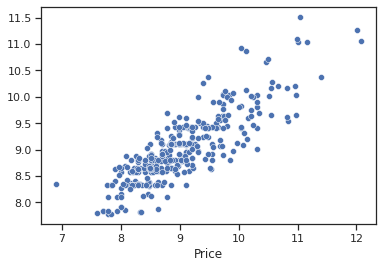

In [89]:
y_pred_test_etr = etr.predict(X_test)
sns.scatterplot(y_test, y_pred_test_etr);

In [90]:
## MAE
mean_absolute_error(y_test, y_pred_test_etr)

0.32001116246885203

In [91]:
np.exp(0.3368904223543692)

1.400585582459

In [92]:
## MSE
mean_squared_error(y_test, y_pred_test_etr)

0.17342074269977906

In [93]:
## RMSE
np.sqrt(mean_squared_error(y_test, y_pred_test_etr))

0.4164381619157628

In [94]:
r2_score(y_test, y_pred_test_etr)

0.7204422735295886

**Conclusion: XD Boost Regressor is giving the best r2 score.**